# **UNIVERSIDAD TORCUATO DI TELLA**
## **MAESTRÍA EN ECONOMETRÍA**

---

### **EXAMEN FINAL DE MICROECONOMETRÍA**

- **Profesor:** González-Rozada, Martín  
- **Ayudante:** Maiorano, Romina  
- **Alumno:** Guzzi, David Alexander  (Legajo n°: 24H1970, DNI: 37.703.649)  

**Ciclo Lectivo:** Tercer Trimestre, 2024  

---

In [1]:
# Importación de librerías.
import pandas as pd
import numpy as np
import pyreadstat as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t, norm, truncnorm
from scipy.optimize import root_scalar
import warnings
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels.discrete.discrete_model import Logit, Probit
from scipy.special import erf

# Semilla para la generación de números aleatorios.
np.random.seed(3649)

# Configuración de pandas (4 decimales y visualización de todas las columnas).
pd.set_option("display.float_format", "{:.4f}".format)
pd.set_option('display.max_columns', None)

#### **IMPORTACIÓN Y LECTURA DE DATOS.**

In [2]:
# Lectura y visualización del dataset.
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2024\2024 3T\[MT06] Microeconometría I\Trabajo final\CreditoHipotecario.dta"

df_1, meta = st.read_dta(path)
df_1.head(1)

,seq,s3,s4,s5,s6,s7,s9,s11,s13,s14,s15,s16,s17,s18,s19a,s19b,s19c,s19d,s20,s23a,s24a,s25a,s26a,s27a,s30a,s30c,s31a,s31c,s32,s33,s34,s35,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,netw,uria,rtdum,bd,mi,old,vr,school,chval,dnotown,dprop,deny,pi_ratio,black,hse_inc,loan_val,ccred,mcred,pubrec,denpmi,selfemp,married,single,hischl,probunmp,condo
0,2.0000,1.0000,1.0000,1.0000,88.0000,1.0000,1120.0000,0.0000,5.0000,5.0000,2.0000,1.0000,53.0000,8.0000,NA,NA,NA,NA,1.0000,M,0.0000,19.0000,19.0000,0.0000,1938.0000,2000.0000,2241.0000,2000.0000,939.0000,110.0000,0.0000,30.0000,0.0000,0.0000,34.0000,2.0000,5.0000,0.0000,22.1000,22.1000,3.0000,360.0000,NA,110.0000,2.0000,0.0000,0.0000,N,0.0000,1.0000,999999.3750,92.0000,3.9000,0.0000,1.0000,1.0000,1.0000,0.0000,15.0000,206.7355,0.0000,0.0000,0.0000,0.2210,0.0000,0.2210,0.8000,5.0000,2.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,3.9000,0.0000


In [3]:
# Breve descipción del dataset.
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 77 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   seq       2380 non-null   float64
 1   s3        2380 non-null   float64
 2   s4        2380 non-null   float64
 3   s5        2380 non-null   float64
 4   s6        2380 non-null   float64
 5   s7        2380 non-null   float64
 6   s9        2380 non-null   float64
 7   s11       2380 non-null   float64
 8   s13       2380 non-null   float64
 9   s14       2379 non-null   float64
 10  s15       2380 non-null   float64
 11  s16       2379 non-null   float64
 12  s17       2380 non-null   float64
 13  s18       2265 non-null   float64
 14  s19a      2380 non-null   object 
 15  s19b      2380 non-null   object 
 16  s19c      2380 non-null   object 
 17  s19d      2380 non-null   object 
 18  s20       2380 non-null   float64
 19  s23a      2380 non-null   object 
 20  s24a      2380 non-null   floa

#### **EJERCICIO 1.**
En este ejercicio se va a examinar **si la raza es un factor a la hora de rechazar una solicitud de crédito hipotecario**; la variable dependiente binaria vale uno si se rechaza una solicitud de crédito. Los datos fueron por investigadores del Banco de la Reserva Federal de Chicago y se relacionan con solicitudes de hipotecas presentadas en el área metropolitana de Chicago, en 1995. Durante el período cubierto por estos datos, la decisión de aprobar una solicitud de crédito normalmente la tomaba un oficial del banco. El oficial debe evaluar si el solicitante realizará los pagos del préstamo. Un dato importante es el tamaño de los pagos requeridos del créedito en relación con los ingresos del solicitante. Como sabe cualquiera que haya pedido dinero prestado, es mucho más fácil realizar pagos que representen el 10% de sus ingresos que el 50%. Por lo tanto, comenzaremos analizando la relación entre dos variables: la v**ariable dependiente binaria deny**, que es igual a 1 si la solicitud de créedito fue rechazada y es igual a 0 si fue aceptada, y la **variable continua pi_ratio**, que es la relación entre los pagos mensuales totales previstos del crédito del solicitante y sus ingresos mensuales. La base de datos es: CreditoHipotecario.dta.

**Se presentan una función y una clase que se utilizarán en el apartado 1:**
- **Función ols_estimation:** realiza estimación OLS;
- **Clase LogitProbitEstimation:** realiza estimación Logit y Probit.

**Observación:** en la mayoría de los casos, se prescinde del uso de librerías como *statsmodels*, que incluyen implementaciones de OLS, Logit y Probit, con el fin de aplicar las ecuaciones vistas en clase, lo que aporta mayor claridad. Para operaciones matriciales, se utiliza la librería *numpy*. Para el desarrollo de la clase **LogitProbitEstimation**, se utilizó la clase GenericLikelihoodModel de *statsmodels*, con el objetivo de utilizar métodos de optimización eficientes y confiables en la estimación de los parámetros de la log-verosimilitud definida. Se ha contrastado que **todos los resultados sean consistentes con los obtenidos en Stata**. 

In [4]:
def ols_estimation(y: pd.Series, x: pd.DataFrame, add_intercept: bool = True) -> pd.DataFrame:
    
    """
    Estima un modelo OLS.
    
    Parámetros
    -----------
    x : pd.DataFrame
        DataFrame de variables independientes.
    y : pd.Series o np.ndarray
        Serie o vector de la variable dependiente.
    add_intercept : bool, opcional
        Si es True, se agrega una columna de unos para el intercepto. Por defecto es True.
    
    Retorna
    -------
    pd.DataFrame
        DataFrame con las siguientes columnas:
        - Variable: Nombre de la variable independiente.
        - Coeficiente: Estimación del coeficiente OLS.
        - Error estándar: Error estándar del coeficiente.
        - t-valor: Estadístico t de la estimación.
        - p-valor: p-valor asociado al coeficiente.
        - Límite inferior: Límite inferior del intervalo de confianza.
        - Límite superior: Límite superior del intervalo de confianza.
    """
    if isinstance(x, pd.DataFrame):
        variable_names = x.columns.tolist()
        x = x.values
    else:
        variable_names = [f"x{i+1}" for i in range(x.shape[1])]
    
    if isinstance(y, pd.Series):
        y = y.values
    
    if add_intercept:
        X = np.column_stack((np.ones(len(x)), x))
        variable_names = ["_const"] + variable_names
    else:
        X = x
    
    obs, col = X.shape
    
    # Estimación de coeficientes.
    beta_coef = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Estimación del error cuadrático medio de los residuos.
    residuals = y - X @ beta_coef
    s2 = (residuals.T @ residuals) / (obs - col)
    
    # Matriz de varianzas y covarianzas.
    beta_var = s2 * np.linalg.inv(X.T @ X)
    
    # Errores estándar.
    beta_std = np.sqrt(np.diag(beta_var))
    
    # Valores t.
    t_values = beta_coef / beta_std
    
    # p-values.
    p_values = 2 * (1 - t.cdf(np.abs(t_values), df=obs-col))
    
    # Intervalos de confianza.
    alpha = 0.05
    t_crit = t.ppf(1 - alpha/2, df=obs-col)
    lower_interval = beta_coef - t_crit * beta_std
    upper_interval = beta_coef + t_crit * beta_std
    
    # Construcción del DataFrame.
    results_df = pd.DataFrame({
        'independent_variable': variable_names,
        'coefficients': beta_coef,
        'standard_errors': beta_std,
        't_value': t_values,
        'p_value': p_values,
        'lower_interval': lower_interval,
        'upper_interval': upper_interval
    })
    
    return results_df

In [5]:
class LogitProbitEstimation(GenericLikelihoodModel):
    
    """
    Modelo de regresión binaria basado en máxima verosimilitud para Logit y Probit.
    Se basa en la clase `GenericLikelihoodModel` de `statsmodels` que permite obtener estimaciones 
    mediante máxima verosimilitud, luego de determinar la correspondiente log-verosimilitud.

    Parámetros
    ----------
    endog : array-like
        Variable dependiente binaria (0 o 1).
    exog : array-like
        Matriz de variables explicativas (incluyendo la constante si es necesario).
    model_type : str, opcional
        Tipo de modelo a estimar: "logit" o "probit". Por defecto, "logit".
    **kwargs : dict, opcional
        Argumentos adicionales para `GenericLikelihoodModel`.

    Métodos
    -------
    loglike(params)
        Calcula la función de log-verosimilitud del modelo.
    
    fit(start_params=None, disp=0, **kwargs)
        Ajusta el modelo mediante máxima verosimilitud.

    marginal_effects(at="mean", column_names=None)
        Calcula los efectos marginales de las variables independientes:
            - "mean": evaluado en la media de las variables.
            - "average": promedio de los efectos marginales individuales.

    summary_custom(column_names=None)
        Genera un resumen de los coeficientes estimados, errores estándar y otros 
        estadísticos relevantes.
    """
    
    def __init__(self, endog, exog, model_type="logit", add_intercept=True, **kwargs):
        if add_intercept:
            exog = np.column_stack((np.ones(len(exog)), exog))
        
        super().__init__(endog, exog, **kwargs)
        
        if model_type not in ["logit", "probit"]:
            raise ValueError("El parámetro 'model_type' debe ser 'logit' o 'probit'")
        self.model_type = model_type
    
    def loglike(self, params):
        exog = self.exog
        endog = self.endog
        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            p = 1 / (1 + np.exp(-linear_pred))
        elif self.model_type == "probit":
            p = 0.5 * (1 + erf(linear_pred / np.sqrt(2)))

        # Asegurar que p no sea 0 ni 1.
        p = np.clip(p, 1e-10, 1 - 1e-10)
        
        return (endog * np.log(p) + (1 - endog) * np.log(1 - p)).sum()
    
    def fit(self, start_params=None, disp=0, **kwargs):
        warnings.filterwarnings('ignore', category=UserWarning)
        
        if self.model_type == "logit":
            init_model = Logit(self.endog, self.exog).fit(disp=0)
        else:
            init_model = Probit(self.endog, self.exog).fit(disp=0)

        self.results = super().fit(start_params=init_model.params, disp=disp, **kwargs)
        self.params = self.results.params  
        
        return self.results
    
    def predict(self, params=None, exog=None):
        if params is None:
            params = self.params 
        if exog is None:
            exog = self.exog

        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            pred = 1 / (1 + np.exp(-linear_pred))
        elif self.model_type == "probit":
            pred = 0.5 * (1 + erf(linear_pred / np.sqrt(2)))

        return pred

    def marginal_effects(self, column_names=None):
        params = self.params
        exog = self.exog
        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            density = np.exp(-linear_pred) / (1 + np.exp(-linear_pred))**2
        elif self.model_type == "probit":
            density = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * linear_pred**2)

        x_mean = np.mean(exog, axis=0)
        mean_pred = np.dot(x_mean, params)
        
        if self.model_type == "logit":
            mean_p = 1 / (1 + np.exp(-mean_pred))
            mean_marginal_effect = mean_p * (1 - mean_p) * params
        elif self.model_type == "probit":
            mean_p = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * mean_pred**2)
            mean_marginal_effect = mean_p * params

        avg_marginal_effect = np.mean(density, axis=0) * params

        # Asignar nombres a las variables independientes
        if column_names is None:
            column_names = [f'Variable {i}' for i in range(1, exog.shape[1])]

        marginal_effects_list = [
            {"independent_variable": column_names[i - 1], "mean_marginal_effect": mean_marginal_effect[i], 'avg_marginal_effect': avg_marginal_effect[i]}
            for i in range(1, exog.shape[1])
        ]
        
        return pd.DataFrame(marginal_effects_list)
    
    def summary_custom(self, column_names=None):
        params = self.params
        std_errors = self.results.bse

        if column_names is None:
            column_names = [f'Variable {i}' for i in range(self.exog.shape[1])]
        else:
            column_names = ['_const'] + list(column_names)

        z_values = params / std_errors
        p_values = 2 * (1 - norm.cdf(np.abs(z_values)))
        ci = 1.96 * std_errors
        lower_interval = params - ci
        upper_interval = params + ci

        results_df = pd.DataFrame({
            'independent_variable': column_names,
            'coefficients': params,
            'standard_errors': std_errors,
            'z_value': z_values,
            'p_value': p_values,
            'lower_interval': lower_interval,
            'upper_interval': upper_interval
        })

        return results_df

**Ejercicios:**

**1.1.** Presente un diagrama de dispersión (*scatterplot*) de deny contra pi_ratio junto con la línea de regresión muestral y describa lo que observa. ¿Es razonable la estimación?

**1.2.** Estime la relación de la figura anterior por MCC e interprete sus resultados.

**1.3.** Para capturar el efecto de la raza sobre la probabilidad de que la solicitud del crédito sea rechazada, agregue como variable explicativa black. Interorete el coeficiente estimado sobre esta variable.

**1.4.** Repita el punto 1. pero con la estimación de un modelo Logit y un modelo Probit.

**1.5.** Presente el resultado de la estimación por Logot y Probit del punto anterior, calcule los efectos marginales e interprételos. ¿Qué cambia con respecto a su interpretación en 1.1.?

**1.6.** Repita el punto 1.3. pero ahora estime el modelo usando un Logit y un Probit. Interprete sus resultados.

**1.7.** Compara los resultados de las tres estimaciones: MCC, Logit y Probit.

**1.8.** Estime por Logit y Probit un modelo más completo que use como variables explicativas (además de las del punto 1.6.): hse_inc, loan_val, ccred, mcred, pubrec, denpmi, selfemp, married, single, hischl. probunmp y condo. Interprete todos los resultados.

**Ejercicio 1.1.**

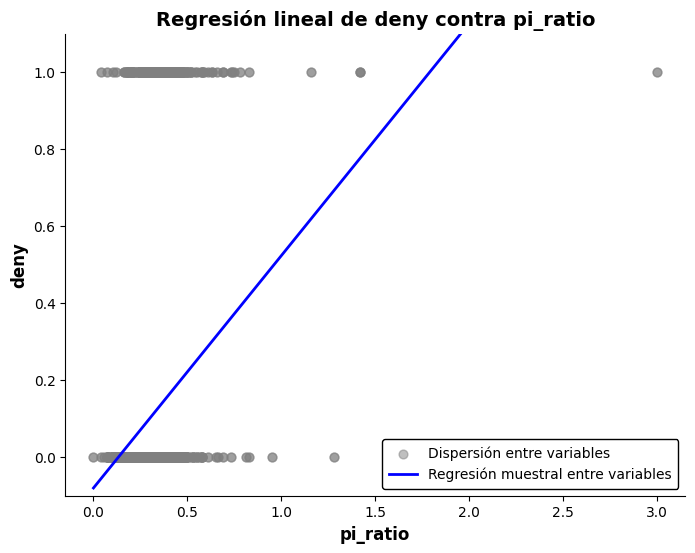

In [6]:
# Se define estructura.
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de dispersión con línea de regresión.
sns.regplot(
    x='pi_ratio', y='deny', data=df_1, ci=None, 
    scatter_kws={'alpha': 0.5, 's': 40, 'color': 'gray'}, 
    line_kws={'color': 'blue', 'linewidth': 2}, 
    ax=ax
)

# Personalización.
ax.set_xlabel('pi_ratio', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('deny', fontsize=12, fontweight='bold', color='black')
ax.set_title('Regresión lineal de deny contra pi_ratio', fontsize=14, fontweight='bold', color='black')

# Limitar el eje Y.
ax.set_ylim(-0.1, 1.1)

# Eliminar bordes superiores y derechos.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda.
scatter_legend = ax.scatter(df_1['pi_ratio'], df_1['deny'], alpha=0.5, s=40, color='gray', label="Dispersión entre variables")
line_legend, = ax.plot([], [], color='blue', linewidth=2, label="Regresión muestral entre variables")  
ax.legend(
    loc='lower right',  
    fontsize=10, 
    frameon=True,  
    facecolor='white',  
    edgecolor='black',  
    framealpha=1,
    borderpad=0.5
)
plt.show()

**Ejercicio 1.2.**

In [7]:
# Se definen variables.
y_ex1 = df_1['deny']
x1_ex1 = df_1[['pi_ratio']] # ex1: exercise 1.

In [8]:
ols_results1_ex1 = ols_estimation(y_ex1, x1_ex1)
ols_results1_ex1

,independent_variable,coefficients,standard_errors,t_value,p_value,lower_interval,upper_interval
0,_const,-0.0799,0.0212,-3.7768,0.0002,-0.1214,-0.0384
1,pi_ratio,0.6035,0.0608,9.9200,0.0000,0.4842,0.7228


**Ejercicio 1.3.**

In [9]:
# Se definen variables.
x2_ex1 = df_1[['pi_ratio', 'black']]

In [10]:
ols_results2_ex1 = ols_estimation(y_ex1, x2_ex1)
ols_results2_ex1

,independent_variable,coefficients,standard_errors,t_value,p_value,lower_interval,upper_interval
0,_const,-0.0905,0.0208,-4.3542,0.0000,-0.1313,-0.0497
1,pi_ratio,0.5592,0.0599,9.3403,0.0000,0.4418,0.6766
2,black,0.1774,0.0184,9.6589,0.0000,0.1414,0.2134


**Ejercicios 1.4. y 1.5.**

In [11]:
# Se presenta un modelo Logit.
model_logit = LogitProbitEstimation(y_ex1, x1_ex1)
result_logit = model_logit.fit()
model_logit.summary_custom(column_names=x1_ex1.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-4.0284,0.2686,-14.9992,0.0000,-4.5548,-3.5020
1,pi_ratio,5.8845,0.7336,8.0214,0.0000,4.4466,7.3224


In [12]:
model_logit.marginal_effects(column_names=x1_ex1.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.5801,0.5907


In [13]:
# Se presenta un modelo Probit.
model_probit = LogitProbitEstimation(y_ex1, x1_ex1, model_type='probit')
result_probit = model_probit.fit()
model_probit.summary_custom(column_names=x1_ex1.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-2.1942,0.1290,-17.0103,0.0000,-2.4470,-1.9413
1,pi_ratio,2.9679,0.3591,8.2647,0.0000,2.2641,3.6718


In [14]:
model_probit.marginal_effects(column_names=x1_ex1.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.5678,0.5665


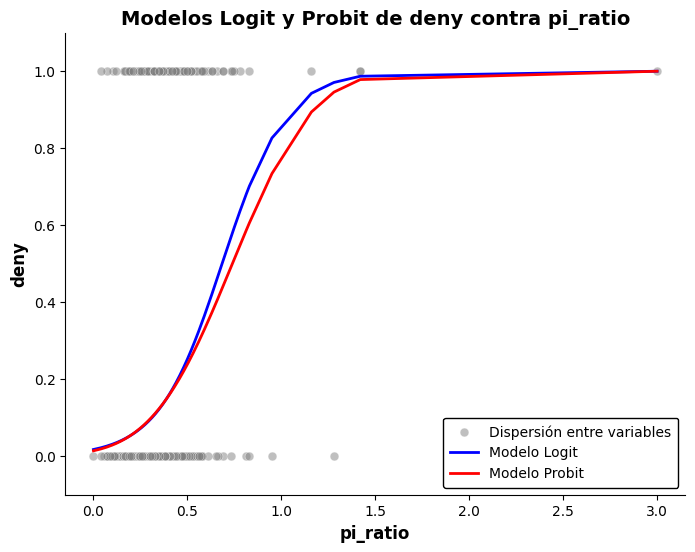

In [15]:
# Definir valores de pi_ratio ordenados para la curva.
pi_ratio_sorted = np.sort(df_1['pi_ratio'])
X_sorted = np.column_stack((np.ones(len(pi_ratio_sorted)), pi_ratio_sorted))

# Obtener predicciones de los modelos.
pred_logit = result_logit.predict(X_sorted)
pred_probit = result_probit.predict(X_sorted)

# Se define estructura.
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de dispersión.
sns.scatterplot(
    x=df_1['pi_ratio'], y=df_1['deny'], alpha=0.5, s=40, color='gray', ax=ax, label="Dispersión entre variables"
)

# Curvas ajustadas.
ax.plot(pi_ratio_sorted, pred_logit, color='blue', linewidth=2, label="Modelo Logit")
ax.plot(pi_ratio_sorted, pred_probit, color='red', linewidth=2, label="Modelo Probit")

# Personalización.
ax.set_xlabel('pi_ratio', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('deny', fontsize=12, fontweight='bold', color='black')
ax.set_title('Modelos Logit y Probit de deny contra pi_ratio', fontsize=14, fontweight='bold', color='black')

# Limitar el eje Y.
ax.set_ylim(-0.1, 1.1)

# Eliminar bordes superiores y derechos.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda.
ax.legend(
    loc='lower right',  
    fontsize=10, 
    frameon=True,  
    facecolor='white',  
    edgecolor='black',  
    framealpha=1,
    borderpad=0.5
)

# Guardar en alta resolución para publicación.
plt.savefig("logit_probit_regresion.png", dpi=300, bbox_inches='tight')

plt.show()

**Ejercicio 1.6.**

In [16]:
model_logit2 = LogitProbitEstimation(y_ex1, x2_ex1)
result_logit2 = model_logit2.fit()
model_logit2.summary_custom(column_names=x2_ex1.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-4.1256,0.2684,-15.3700,0.0000,-4.6517,-3.5995
1,pi_ratio,5.3704,0.7283,7.3736,0.0000,3.9429,6.7979
2,black,1.2728,0.1462,8.7059,0.0000,0.9862,1.5593


In [17]:
model_logit2.marginal_effects(column_names=x2_ex1.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.4949,0.5183
1,black,0.1173,0.1228


In [18]:
model_probit2 = LogitProbitEstimation(y_ex1, x2_ex1, model_type='probit')
result_probit2 = model_probit2.fit()
model_probit2.summary_custom(column_names=x2_ex1.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-2.2587,0.1299,-17.3907,0.0000,-2.5133,-2.0042
1,pi_ratio,2.7416,0.3596,7.6244,0.0000,2.0368,3.4464
2,black,0.7082,0.0834,8.4878,0.0000,0.5446,0.8717


In [19]:
model_probit2.marginal_effects(column_names=x2_ex1.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.5002,0.5014
1,black,0.1292,0.1295


**Ejercicio 1.8.**

In [20]:
# Se definen variables.
x3_ex1 = df_1[['pi_ratio', 'black', 'hse_inc', 'loan_val', 'ccred', 'mcred', 'pubrec', 'denpmi', 'selfemp', 'single', 'hischl', 'probunmp', 'condo']] # Obs.: Se omite 'married' por ser...

In [21]:
model_logit3 = LogitProbitEstimation(y_ex1, x3_ex1)
result_logit3 = model_logit3.fit()
model_logit3.summary_custom(column_names=x3_ex1.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-6.0466,0.6965,-8.6813,0.0000,-7.4118,-4.6815
1,pi_ratio,4.7984,1.0350,4.6363,0.0000,2.7699,6.8269
2,black,0.7037,0.1804,3.9008,0.0001,0.3501,1.0572
3,hse_inc,-0.4828,1.2370,-0.3903,0.6963,-2.9074,1.9417
4,loan_val,1.8039,0.4989,3.6160,0.0003,0.8261,2.7817
5,ccred,0.2964,0.0398,7.4402,0.0000,0.2183,0.3745
6,mcred,0.2417,0.1430,1.6901,0.0910,-0.0386,0.5220
7,pubrec,1.2313,0.2048,6.0127,0.0000,0.8299,1.6327
8,denpmi,4.5449,0.5544,8.1979,0.0000,3.4583,5.6315
9,selfemp,0.6471,0.2126,3.0439,0.0023,0.2304,1.0638


In [22]:
model_logit3.marginal_effects(column_names=x3_ex1.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.3288,0.3610
1,black,0.0482,0.0529
2,hse_inc,-0.0331,-0.0363
3,loan_val,0.1236,0.1357
4,ccred,0.0203,0.0223
5,mcred,0.0166,0.0182
6,pubrec,0.0844,0.0926
7,denpmi,0.3114,0.3419
8,selfemp,0.0443,0.0487
9,single,0.0308,0.0338


In [23]:
model_probit3 = LogitProbitEstimation(y_ex1, x3_ex1, model_type='probit')
result_probit3 = model_probit3.fit()
model_probit3.summary_custom(column_names=x3_ex1.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-3.1017,0.3635,-8.5333,0.0000,-3.8142,-2.3893
1,pi_ratio,2.5009,0.5304,4.7149,0.0000,1.4612,3.5405
2,black,0.3957,0.0988,4.0043,0.0001,0.2020,0.5894
3,hse_inc,-0.3766,0.6548,-0.5752,0.5651,-1.6600,0.9067
4,loan_val,0.7872,0.2430,3.2396,0.0012,0.3109,1.2635
5,ccred,0.1575,0.0216,7.3048,0.0000,0.1153,0.1998
6,mcred,0.1224,0.0750,1.6313,0.1028,-0.0247,0.2695
7,pubrec,0.7059,0.1190,5.9327,0.0000,0.4727,0.9391
8,denpmi,2.5668,0.2838,9.0449,0.0000,2.0106,3.1231
9,selfemp,0.3412,0.1124,3.0348,0.0024,0.1208,0.5616


In [24]:
model_probit3.marginal_effects(column_names=x3_ex1.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.3697,0.3622
1,black,0.0585,0.0573
2,hse_inc,-0.0557,-0.0545
3,loan_val,0.1164,0.1140
4,ccred,0.0233,0.0228
5,mcred,0.0181,0.0177
6,pubrec,0.1043,0.1022
7,denpmi,0.3794,0.3718
8,selfemp,0.0504,0.0494
9,single,0.0363,0.0356


#### **EJERCICIO 2.**
Este ejercicio analiza el impacto de diferentes grados de truncamiento en el **Modelo Tobit**.

**Se presentan una función y una clase que se utilizarán en el apartado 1:**
- **Función generate_latent_variable_df:** genera la simulación de la variable latente;
- **Clase TruncatedTobit:** estima un Model Tobit para una variable dependiente truncada.

**Observación:** en la mayoría de los casos, se prescinde del uso de librerías como *statsmodels*, que incluyen implementaciones de OLS, Logit y Probit, con el fin de aplicar las ecuaciones vistas en clase, lo que aporta mayor claridad. Para operaciones matriciales, se utiliza la librería *numpy*. Para el desarrollo de la clase **TruncatedTobit** (1), se utilizó la clase GenericLikelihoodModel de *statsmodels*, con el objetivo de utilizar métodos de optimización eficientes y confiables en la estimación de los parámetros de la log-verosimilitud definida. Se ha contrastado que **todos los resultados sean consistentes con los obtenidos en Stata**. 

(1) La mayoría de los desarrollos provienen de **py4etrics** (https://github.com/Py4Etrics/py4etrics). Dado el ejercicio, se ha implementado una versión personalizada. 

In [25]:
def generate_latent_variable_df(n_observations: int = 2000, target_negative_proportion: float = 0.30, heteroskedastic: bool = False) -> tuple[pd.DataFrame, pd.DataFrame]:
   
    """
    Genera un DataFrame con una variable latente y su versión truncada.

    La función simula una variable latente dependiente `y*` a partir de una regresión lineal 
    con una variable independiente `x` (distribuida uniformemente en [0,1]) y un 
    término de error `u` que puede ser homocedástico o heterocedástico.

    El término de error `u` sigue una distribución normal con media 0. En el caso 
    homocedástico, su varianza es constante y igual a 3. En el caso heterocedástico, 
    su desviación estándar depende de `z`, una variable correlacionada pero no 
    perfectamente con `x`, con una estructura de varianza dada por `(2 * z)`.

    Parámetros
    ----------
    n_observations : int, opcional
        Número de observaciones a generar (por defecto 2000).
    target_negative_proportion : float, opcional
        Proporción objetivo de valores negativos en `y` (por defecto 0.30).
    heteroskedastic : bool, opcional
        Si es `True`, se introduce heterocedasticidad en el término de error `u` 
        (por defecto `False`).

    Retorna
    -------
    df : pandas.DataFrame
        DataFrame con las variables generadas:
        - 'num_obs': índice de observaciones.
        - 'y': variable dependiente generada.
        - 'k': valor final de k tras iteraciones.
        - 'x': variable independiente.
        - 'u': término de error.

    df_t : pandas.DataFrame
        Versión truncada del DataFrame, que solo incluye observaciones donde `y*` > 0.
    """
    
    def negative_proportion_for_k(k):
        """Calcula la proporción de valores negativos en y* para un valor dado de k."""
        # Se genera x.
        x = np.random.uniform(0, 1, n_observations) # x ~ uniform[0, 1].
        
        # Se genera u.
        if heteroskedastic:
            z = x + np.random.normal(0, 0.1, n_observations)
            sigma_u = np.sqrt(2 * np.maximum(z, 0.01)) # Heterocedasticidad. Se elige 2 arbitrariamente. Se asegura positividad de z.
        else:
            sigma_u = np.full(n_observations, np.sqrt(3)) # Homocedasticidad: u ~ normal[0,3]
        u = np.random.normal(0, sigma_u, n_observations)
        
        # Se genera y.
        y = k + 3 * x + u
        
        return np.mean(y < 0) - target_negative_proportion  # Diferencia con el target
    
    # Buscar el valor óptimo de k con root_scalar
    result = root_scalar(negative_proportion_for_k, bracket=[-10, 10], method='brentq')
    k_opt = result.root  # k óptimo encontrado

    # Generar datos finales con el k encontrado
    x = np.random.uniform(0, 1, n_observations)
    if heteroskedastic:
        z = x + np.random.normal(0, 0.1, n_observations)
        sigma_u = np.sqrt(2 * np.maximum(z, 0.01))
    else:
        sigma_u = np.full(n_observations, np.sqrt(3))
    u = np.random.normal(0, sigma_u, n_observations)
    y = k_opt + 3 * x + u

    # Crear DataFrame con variables generadas
    df = pd.DataFrame({
        'num_obs': np.arange(1, n_observations + 1),
        'y': y,
        'k': k_opt,
        'x': x,
        'u': u
    })

    # Crear muestra truncada
    df_t = df[df['y'] > 0].reset_index(drop=True)

    return df, df_t

In [26]:
class TruncatedTobit(GenericLikelihoodModel):
    
    """
    Modelo Tobit para variable dependiente truncada basado en máxima verosimilitud.

    Esta clase implementa un Modelo Tobit con truncamiento, basado en la clase 
    `GenericLikelihoodModel` de `statsmodels`, lo que permite la estimación 
    mediante máxima verosimilitud.

    Parámetros
    ----------
    endog : array-like
        Variable dependiente truncada.
    exog : array-like
        Matriz de variables explicativas truncada (sin incluir la constante).
    left : float, opcional
        Límite inferior de truncamiento. Por defecto, `-inf` (sin truncamiento inferior).
    right : float, opcional
        Límite superior de truncamiento. Por defecto, `inf` (sin truncamiento superior).
    add_intercept : bool, opcional
        Si es `True`, agrega una constante a la matriz de variables explicativas. 
        Por defecto, `True`.
    **kwds : dict, opcional
        Argumentos adicionales para `GenericLikelihoodModel`.

    Métodos
    -------
    loglikeobs(params)
        Calcula la función de log-verosimilitud para cada observación.
    
    fit
        Ajusta el modelo mediante máxima verosimilitud.

    marginal_effects(column_names=None)
        Calcula los efectos marginales de las variables independientes, ajustados por truncamiento.

    summary_custom(column_names=None)
        Genera un resumen de los coeficientes estimados, errores estándar y otros 
        estadísticos relevantes.
    """

    def __init__(self, endog, exog, left=None, right=None, add_intercept=True, **kwds):
        super(TruncatedTobit, self).__init__(endog, exog, **kwds)
        self.left = left if left is not None else -np.inf
        self.right = right if right is not None else np.inf

        if add_intercept:
            exog = np.column_stack((np.ones(len(exog)), exog))

        super().__init__(endog, exog, **kwds)

    def loglikeobs(self, params):
        s = params[-1]
        beta = params[:-1]
        
        linear_pred = np.dot(self.exog, beta)
        _l = (self.left - linear_pred) / np.exp(s)
        _r = (self.right - linear_pred) / np.exp(s)
        return truncnorm.logpdf(self.endog, a=_l, b=_r, loc=linear_pred, scale=np.exp(s))

    def fit(self, cov_type='nonrobust', disp=0, start_params=None, maxiter=10000, maxfun=10000, **kwds):
        warnings.filterwarnings('ignore', category=UserWarning)

        if 'Log(Sigma)' not in self.exog_names:
            self.exog_names.append('Log(Sigma)')
        
        res_ols = sm.OLS(self.endog, self.exog).fit(disp=disp)
        params_ols = res_ols.params
        sigma_ols = np.log(np.std(res_ols.resid))
        
        if start_params is None:
            start_params = np.append(params_ols, sigma_ols)
        
        self.results = super(TruncatedTobit, self).fit(cov_type=cov_type, start_params=start_params,
                                         maxiter=maxiter, maxfun=maxfun, disp=disp, **kwds)
        self.params = self.results.params  
        
        return self.results

    def marginal_effects(self, column_names=None):
        params = self.params
        s = np.exp(params[-1])  # Convertir log(sigma) a sigma
        beta = params[:-1]  # Coeficientes de las variables independientes
        exog = self.exog
        linear_pred = np.dot(exog, beta)
        w = linear_pred / s
        mills_ratio = norm.pdf(w) / norm.cdf(w)

        avg_marginal_effect = np.mean(1 - w * mills_ratio - mills_ratio**2)

        # Asignar nombres a las variables independientes
        if column_names is None:
            column_names = [f'Variable {i}' for i in range(1, exog.shape[1])]

        marginal_effects_list = [
            {"independent_variable": column_names[i - 1], "avg_marginal_effect": avg_marginal_effect * beta[i]}
            for i in range(1, exog.shape[1])
        ]
        
        return pd.DataFrame(marginal_effects_list)
        
    def summary_custom(self, column_names=None):
        params = self.params
        std_errors = self.results.bse

        if column_names is None:
            column_names = [f'Variable {i}' for i in range(len(params))]
        else:
            column_names = ['_const'] + list(column_names) + ['ln(sigma)']

        z_values = params / std_errors
        p_values = 2 * (1 - norm.cdf(np.abs(z_values)))
        ci = 1.96 * std_errors
        lower_interval = params - ci
        upper_interval = params + ci

        results_df = pd.DataFrame({
            'independent_variable': column_names,
            'coefficients': params,
            'standard_errors': std_errors,
            'z_value': z_values,
            'p_value': p_values,
            'lower_interval': lower_interval,
            'upper_interval': upper_interval
        })

        return results_df

**Ejercicios:**

**2.1.** Genera 2.000 observaciones de una variable latente $y* = k + 3x + u$, donde $u \sim N[0,3]$ y el regresor $x \sim U[0,1]$. Elige $𝑘$ de manera que aproximadamente el 30% de los valores de $𝑦∗$ sean negativos.

**2.2.** Genera una submuestra censurada o truncada excluyendo las observaciones que correspondan a $y* < 0$.

**2.3.** Estima el modelo usando las 2.000 observaciones completas, suponiendo que la variable latente es observable, mediante Mínimos Cuadrados Ordinarios (OLS). Evalúa tus resultados a la luz de las propiedades teóricas de OLS, teniendo en cuenta que solo tienes una replicación.

**2.4.** Utilizando solo la submuestra truncada con $y>0$, estima el modelo mediante OLS.

**2.5.** Usa la opción de máxima verosimilitud truncada para estimar los parámetros con todas las observaciones. Evalúa tus resultados considerando las propiedades del estimador de máxima verosimilitud truncado. Compara con los resultados obtenidos por OLS en las dos partes anteriores.

**2.6.** Repite todos los pasos anteriores utilizando un valor de $k$ que genere el 20%, 40% y 50% de observaciones truncadas. Compara tus resultados con los obtenidos con el 30% de truncamiento. A partir de esto, sugiere cuál es la consecuencia de mayores niveles de truncamiento en las estimaciones de los parámetros. Refuerza tus argumentos con teoría cuando sea posible.

**2.7.** Genera $y*$ con heterocedasticidad haciendo que $u \sim N[0,\sigma^2z]$, donde $z>0$ es una variable que esté correlacionada con $x$, pero no de manera perfecta. Nuevamente, ajusta 
$k$ para obtener aproximadamente un 30% de observaciones truncadas. Utiliza el estimador de máxima verosimilitud para un modelo truncado normal para estimar este modelo y compara los resultados con el caso homocedástico correspondiente.

**Ejercicio 2.1.**

In [27]:
df_2, df_t_2 = generate_latent_variable_df()
# Se generan 2.000 observaciones para y* dado: x ~ uniform[0, 1] y u ~ normal[0,3].
df_2

,num_obs,y,k,x,u
0,1,4.0636,-0.4692,0.5259,2.9552
1,2,-1.4952,-0.4692,0.0177,-1.0792
2,3,-1.6211,-0.4692,0.3121,-2.0881
3,4,3.5506,-0.4692,0.2076,3.3971
4,5,3.8043,-0.4692,0.6265,2.3940
...,...,...,...,...,...
1995,1996,2.9134,-0.4692,0.9133,0.6428
1996,1997,2.5396,-0.4692,0.6790,0.9719
1997,1998,0.7961,-0.4692,0.9417,-1.5598
1998,1999,-1.6017,-0.4692,0.2833,-1.9824


**Ejercicio 2.2.**

In [28]:
# Submuestra para y* > 0.
df_t_2

,num_obs,y,k,x,u
0,1,4.0636,-0.4692,0.5259,2.9552
1,4,3.5506,-0.4692,0.2076,3.3971
2,5,3.8043,-0.4692,0.6265,2.3940
3,6,3.4203,-0.4692,0.4783,2.4547
4,7,1.6547,-0.4692,0.2308,1.4315
...,...,...,...,...,...
1393,1994,0.9063,-0.4692,0.5171,-0.1758
1394,1996,2.9134,-0.4692,0.9133,0.6428
1395,1997,2.5396,-0.4692,0.6790,0.9719
1396,1998,0.7961,-0.4692,0.9417,-1.5598


In [29]:
print(f"El porcentaje de observaciones de y* menores o iguales a cero es de: {1 - df_t_2.shape[0] / df_2.shape[0]:.2f}.")

El porcentaje de observaciones de y* menores o iguales a cero es de: 0.30.


**Ejercicio 2.3.**

In [30]:
# Definición de variables, considerando las 2.000 observaciones.
y_ex2 = df_2['y']
x_ex2 = df_2[['x']]

In [31]:
ols_results1_ex2 = ols_estimation(y_ex2, x_ex2)
ols_results1_ex2

,independent_variable,coefficients,standard_errors,t_value,p_value,lower_interval,upper_interval
0,_const,-0.5605,0.0785,-7.1423,0.0000,-0.7144,-0.4066
1,x,3.2339,0.1346,24.0222,0.0000,2.9699,3.4979


**Ejercicio 2.4.**

In [32]:
# Definición de variables, considerando las observaciones donde y* > 0.
y_ex2_t30 = df_t_2['y']
x_ex2_t30 = df_t_2[['x']]

In [33]:
ols_results2_ex2 = ols_estimation(y_ex2_t30, x_ex2_t30)
ols_results2_ex2

,independent_variable,coefficients,standard_errors,t_value,p_value,lower_interval,upper_interval
0,_const,1.0148,0.0788,12.8788,0.0000,0.8602,1.1694
1,x,1.8301,0.1237,14.7912,0.0000,1.5874,2.0728


**Ejercicio 2.5.**

In [34]:
# Se genera estimación con Modelo Tobit. Obs.: A diferencia de Stata, se debe brindar dataset truncado. Los resultados son exactos a los arribados por Stata. 
tobit_model1 = TruncatedTobit(y_ex2_t30, x_ex2_t30, left=0)
tobit_results1 = tobit_model1.fit()
tobit_model1.summary_custom(column_names=x_ex2_t30.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-0.3696,0.1989,-1.8580,0.0632,-0.7596,0.0203
1,x,3.1660,0.2439,12.9814,0.0000,2.6880,3.6440
2,ln(sigma),0.4996,0.0336,14.8868,0.0000,0.4338,0.5654


In [35]:
#Se presentan los efectos marginales.
tobit_model1.marginal_effects(column_names=x_ex2_t30.columns)

,independent_variable,avg_marginal_effect
0,x,1.8918


**Ejercicio 2.6.**

In [36]:
# 20%, 40% y 50% de observaciones de y* < 0.
df_3, df_t_3 = generate_latent_variable_df(target_negative_proportion=0.2)
df_4, df_t_4 = generate_latent_variable_df(target_negative_proportion=0.4)
df_5, df_t_5 = generate_latent_variable_df(target_negative_proportion=0.5)

print(f"El porcentaje de observaciones de y* menores o iguales a cero es de: {1 - df_t_3.shape[0] / df_3.shape[0]:.2f}.")
print(f"El porcentaje de observaciones de y* menores o iguales a cero es de: {1 - df_t_4.shape[0] / df_4.shape[0]:.2f}.")
print(f"El porcentaje de observaciones de y* menores o iguales a cero es de: {1 - df_t_5.shape[0] / df_5.shape[0]:.2f}.")

El porcentaje de observaciones de y* menores o iguales a cero es de: 0.19.
El porcentaje de observaciones de y* menores o iguales a cero es de: 0.41.
El porcentaje de observaciones de y* menores o iguales a cero es de: 0.49.


In [37]:
# 1. Estimación OLS para todas observaciones de y* > 0.
y_ex2_t20 = df_t_3['y']
x_ex2_t20 = df_t_3[['x']]
ols_results3_ex2 = ols_estimation(y_ex2_t20, x_ex2_t20)
ols_results3_ex2

,independent_variable,coefficients,standard_errors,t_value,p_value,lower_interval,upper_interval
0,_const,1.2765,0.0795,16.0515,0.0000,1.1205,1.4325
1,x,1.9174,0.1277,15.0140,0.0000,1.6669,2.1679


In [38]:
y_ex2_t40 = df_t_4['y']
x_ex2_t40 = df_t_4[['x']]
ols_results4_ex2 = ols_estimation(y_ex2_t40, x_ex2_t40)
ols_results4_ex2

,independent_variable,coefficients,standard_errors,t_value,p_value,lower_interval,upper_interval
0,_const,0.8430,0.0803,10.5023,0.0000,0.6855,1.0005
1,x,1.4864,0.1256,11.8344,0.0000,1.2400,1.7328


In [39]:
y_ex2_t50 = df_t_5['y']
x_ex2_t50 = df_t_5[['x']]
ols_results5_ex2 = ols_estimation(y_ex2_t50, x_ex2_t50)
ols_results5_ex2

,independent_variable,coefficients,standard_errors,t_value,p_value,lower_interval,upper_interval
0,_const,0.7506,0.0901,8.3327,0.0000,0.5739,0.9274
1,x,1.3627,0.1340,10.1703,0.0000,1.0998,1.6256


In [40]:
# 2. Estimación mediante Modelo Tobit.
tobit_model2 = TruncatedTobit(y_ex2_t20, x_ex2_t20, left=0)
tobit_results2 = tobit_model2.fit()
tobit_model2.summary_custom(column_names=x_ex2_t20.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,0.0032,0.1815,0.0177,0.9859,-0.3525,0.3590
1,x,3.1511,0.2332,13.5129,0.0000,2.6940,3.6081
2,ln(sigma),0.5810,0.0301,19.3155,0.0000,0.5220,0.6399


In [41]:
#Se presentan los efectos marginales.
tobit_model2.marginal_effects(column_names=x_ex2_t20.columns)

,independent_variable,avg_marginal_effect
0,x,1.9730


In [42]:
tobit_model3 = TruncatedTobit(y_ex2_t40, x_ex2_t40, left=0)
tobit_results3 = tobit_model3.fit()
tobit_model3.summary_custom(column_names=x_ex2_t40.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-1.1630,0.2999,-3.8777,0.0001,-1.7509,-0.5752
1,x,3.2647,0.3286,9.9363,0.0000,2.6207,3.9087
2,ln(sigma),0.5206,0.0446,11.6620,0.0000,0.4331,0.6081


In [43]:
#Se presentan los efectos marginales.
tobit_model3.marginal_effects(column_names=x_ex2_t40.columns)

,independent_variable,avg_marginal_effect
0,x,1.5677


In [44]:
tobit_model4 = TruncatedTobit(y_ex2_t50, x_ex2_t50, left=0)
tobit_results4 = tobit_model4.fit()
tobit_model4.summary_custom(column_names=x_ex2_t50.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-1.8141,0.4184,-4.3353,0.0000,-2.6342,-0.9939
1,x,3.5085,0.4219,8.3159,0.0000,2.6816,4.3355
2,ln(sigma),0.5613,0.0534,10.5206,0.0000,0.4567,0.6659


In [45]:
#Se presentan los efectos marginales.
tobit_model4.marginal_effects(column_names=x_ex2_t50.columns)

,independent_variable,avg_marginal_effect
0,x,1.4886


**Ejercicio 2.7.**

In [46]:
df_het, df_t_het = generate_latent_variable_df(target_negative_proportion=0.3, heteroskedastic=True)
# Se generan 2.000 observaciones para y* dado: x ~ uniform[0, 1] y u ~ normal[0, sigma^2 * z].
df_het

,num_obs,y,k,x,u
0,1,2.0745,-0.6260,0.8461,0.1620
1,2,2.5743,-0.6260,0.9070,0.4792
2,3,1.8977,-0.6260,0.5137,0.9828
3,4,0.2683,-0.6260,0.0871,0.6331
4,5,-0.5069,-0.6260,0.0769,-0.1118
...,...,...,...,...,...
1995,1996,2.0465,-0.6260,0.8778,0.0391
1996,1997,0.3864,-0.6260,0.3379,-0.0014
1997,1998,1.2284,-0.6260,0.2222,1.1878
1998,1999,0.9944,-0.6260,0.4234,0.3502


In [47]:
df_t_het

,num_obs,y,k,x,u
0,1,2.0745,-0.6260,0.8461,0.1620
1,2,2.5743,-0.6260,0.9070,0.4792
2,3,1.8977,-0.6260,0.5137,0.9828
3,4,0.2683,-0.6260,0.0871,0.6331
4,7,0.3192,-0.6260,0.7831,-1.4040
...,...,...,...,...,...
1372,1996,2.0465,-0.6260,0.8778,0.0391
1373,1997,0.3864,-0.6260,0.3379,-0.0014
1374,1998,1.2284,-0.6260,0.2222,1.1878
1375,1999,0.9944,-0.6260,0.4234,0.3502


In [48]:
print(f"El porcentaje de observaciones de y* menores o iguales a cero es de: {1 - df_t_het.shape[0] / df_het.shape[0]:.2f}.")

El porcentaje de observaciones de y* menores o iguales a cero es de: 0.31.


In [49]:
y_ex2_t30_het = df_t_het['y']
x_ex2_t30_het = df_t_het[['x']]

tobit_model_het = TruncatedTobit(y_ex2_t30_het, x_ex2_t30_het, left=0)
tobit_results_het = tobit_model_het.fit()
tobit_model_het.summary_custom(column_names=x_ex2_t30_het.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-2.2352,0.2212,-10.1042,0.0000,-2.6688,-1.8016
1,x,5.1210,0.2652,19.3107,0.0000,4.6013,5.6408
2,ln(sigma),0.1848,0.0331,5.5781,0.0000,0.1198,0.2497


In [50]:
#Se presentan los efectos marginales.
tobit_model_het.marginal_effects(column_names=x_ex2_t30_het.columns)

,independent_variable,avg_marginal_effect
0,x,2.8761
